<h1 align="center">Densely Connected Convolutional Networks (DenseNet)</h1>


### Introduction

DenseNet is a new CNN architecture that reached State-Of-The-Art (SOTA) results on classification datasets (CIFAR, SVHN, ImageNet) using less parameters. Thanks to its new use of residual it can be deeper than the usual networks and still be easy to optimize.

The DenseNet architecture was proposed in the seminal paper, “Densely Connected Convolutional Networks”. This architecture resulted from the desire to improve higher layer architectures that were being developed. Specifically, improving the problem that many of the layers in high-layer networks were in a sense redundant.

The DenseNet architecture attempts to solve this problem by densely connecting all the layers. This means that each layer receives inputs from all the preceding layers and passes its own information to all subsequent layers, which means that the final output layer has direct information from every single layer including the very first layer. This right here is supposed to improve the problem of redundant layers.

Recent work has shown that convolutional networks can
be substantially **deeper, more accurate, and efficient to train** if they contain shorter connections between layers.


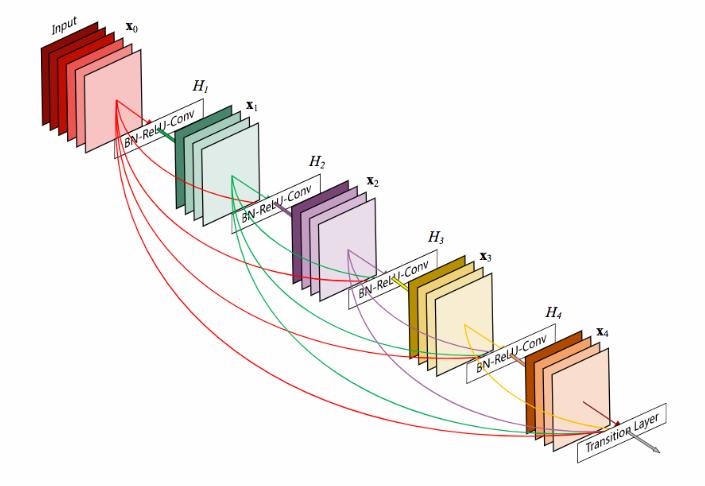

A 5-layer dense block with a growth rate of k = 4. Each layer takes all 	preceding feature-maps as input.


**Advantages:-**

- They alleviate the vanishing-gradient problem

- Strengthen feature propagation

- Encourage feature reuse, and substantially reduce the number of parameters

- Requiring less memory and computation to achieve high performance.

- It requires fewer parameters than traditional convolutional networks



![](https://cdn-images-1.medium.com/max/960/1*9ysRPSExk0KvXR0AhNnlAA.gif)

## Problem at Hand

As CNNs become increasingly deep, a new problem emerges: as information about the input or gradient passes through many layers, it can vanish and “washout” by the time it reaches the end (or beginning) of the
network.

Many recent Architectures are build to address this problems.


**ResNets**


ResNets solve the vanishing gradient problem through  bypass signal from one layer to the next via identity connections. Stochastic depth shortens ResNets by randomly dropping layers during training to allow better information and gradient flow

But recent variations of ResNets show that many layerscontribute very little and can in fact be randomly dropped during training.

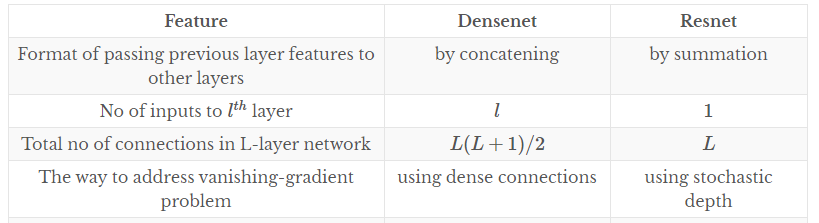


<b>How Densenet Solve this problem !!!</b>

The Dense Convolutional Network (DenseNet) solve this problem by connects each layer to every other layer in a feed-forward fashion. Whereas traditional convolutional networks with L layers have L
connections—one between each layer and its subsequent
layer—our network has L(L+1)/2 direct connections

Foreach layer, the feature-maps of all preceding layers are
used as inputs, and its own feature-maps are used as inputs
into all subsequent layers Because of its dense connectivity pattern, it refer as Dense Convolutional Network (DenseNet)


This constitutes a major difference
between DenseNets and ResNets.




ResNet Stochastic depth

Densenet was partly inspired by that observation

## Important Concepts Related to Architecture

- **Growth Rate**
    - Determine the number of feature maps output by the individual layers inside a dense block.
    
    
    
- **Dense Connectivity**
    - Within a dense block each layer gets as input feature maps from the previous layer.

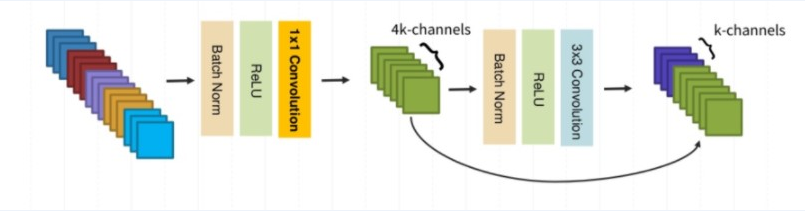


    
- **Trasition layer**
    - It aggregate the feature maps from a dense block & reduce its dimenssion.
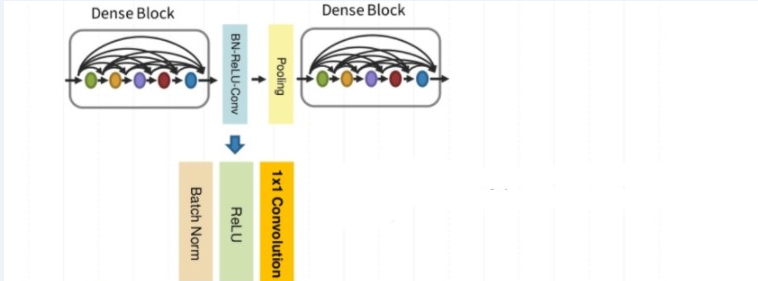    
    
- **Composite Function**
    - In this Seq of operation inside a layer goes as follows 
        - Batch Normalization (BN)
    
        - Non-linear transformation ReLU.
    
        - Pooling, or Convolution.

## Implementation Details

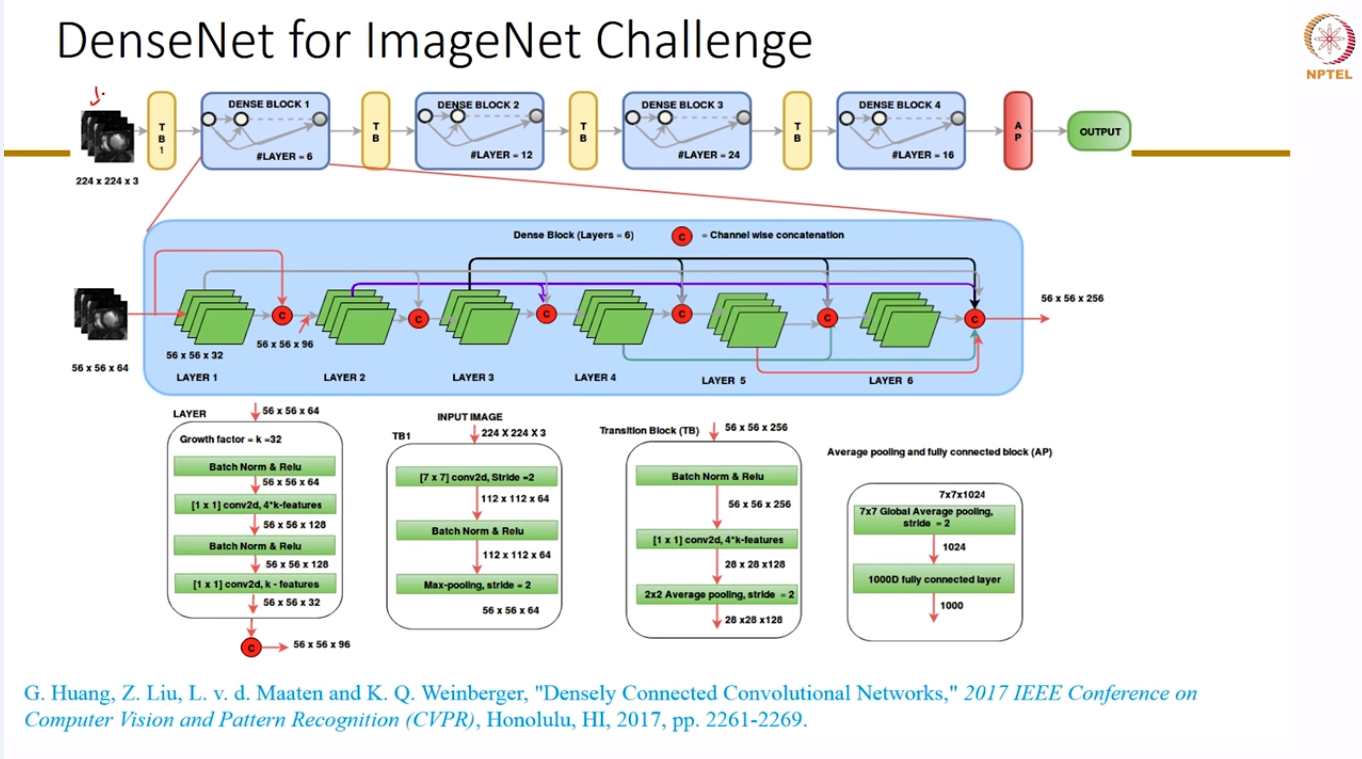
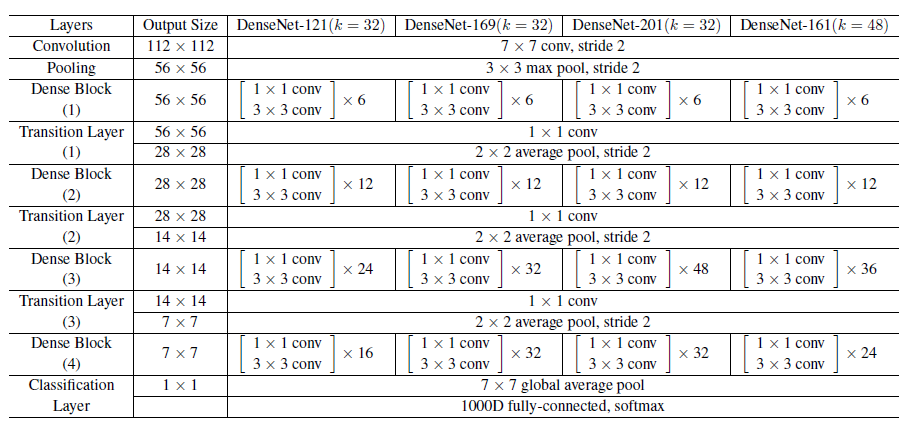


## Experimentation

Demonstrating the effectiveness of DenseNet on several benchmark datasets and comparing the results with other architectures.

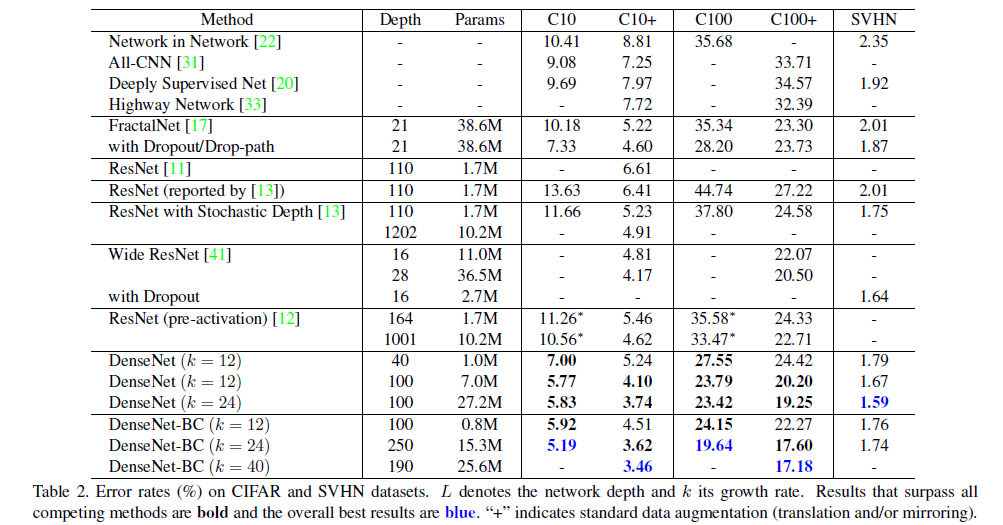

## Training

####  CIFAR, ImageNet, SVHN Dataset

CIFAR Data Set has 2 sets of data set one C10 and C100.
CIFAR-10 (C10) consists of images drawn from 10 and CIFAR-100 (C100) from 100 classes

SVHN The Street View House Numbers (SVHN) dataset contains 32*32 colored digit images

ImageNet The ILSVRC 2012 classification dataset consists 1.2 million images for training, and 50,000 for validation,
from 1; 000 classes

### Stochastic Gradient Descent 

Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or sub differentiable

#### How Stochastic Gradient Descent is applied using Densenet on  CIFAR and SVHN?

it can converge faster as it causes updates to the parameters more frequently.
 
Computational faster compared to normal Gradient Descent
fits Large DataSets and requires less computation time


### What is  Nestrov Momentum Explanation ?

    vt+1=μvt+η∇l(θ-μvt-1)
    θt+1=θt+vt+1
    
    vt+1 = Velocity at time t
    vt = velocity of previous time
    μ =  momentum parameter
    v =  velocity
    

#### What is Overfitting Optimization in Densenet ?

     less prone to overfitting


    
     
   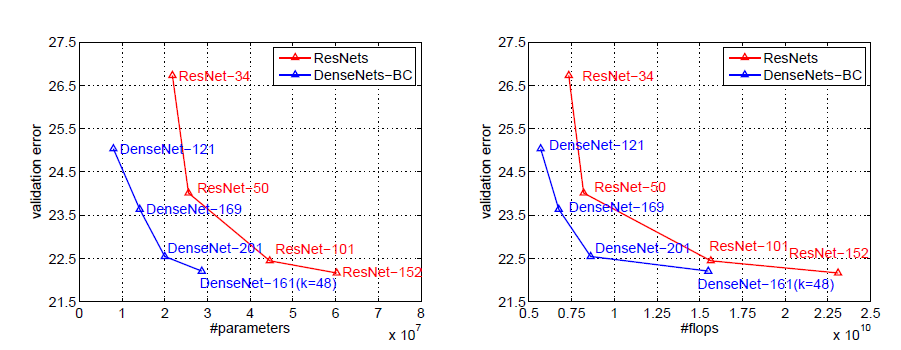
   
   
DenseNet Vs ResNet error Rates on the ImageNet classification dataset as a function of learned  parameters and flops during test time.


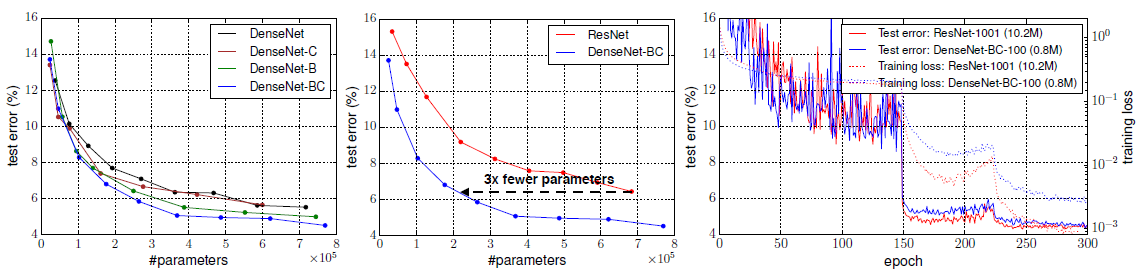



- **Left:** Comparison of the parameter efficiency on C10+ between DenseNet variations. 

- **Middle** Comparison of the parameter efficiency between DenseNet-BC and (pre-activation) ResNets. DenseNet-BC requires about 1/3 of the parameters as ResNet to achieve comparable accuracy. 

- **Right:** Training and testing curves of the with more than 10M parameters and a 100-layer DenseNet with only 0.8M parameters.

## 5. Discussion

As we have seen DenseNets are quite similar to ResNets,

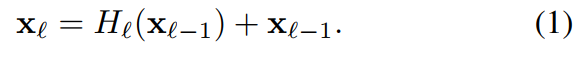

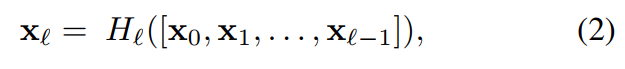

DenseNet Eq. (2) differs from Resnet Eq. (1), only in the inputs to H$l$(·), which are **concatenated** instead of summed.

With this seemingly small modification lead to substantially different behaviors of the two network architectures.

### 1. Model compactness:
With the input concatenation in DenseNet, the feature-maps learned by any of the DenseNet layers can be accessed by all subsequent layers.
This encourages feature reuse throughout the network, and leads to more compact models.

### 2. Implicit Deep Supervision:
One of the reason for the improved accuracy of dense convolutional networks is that individual layers receive additional supervision from the loss function through the shorter connections.

### 3. Stochastic vs. deterministic connection:

In stochastic depth, layers in residual networks are randomly dropped, which creates direct connections between the surrounding layers. Also the pooling layers are never dropped, so the authors say that DenseNet have an interestingly similar connectivity pattern with stochastic depth regularization of residual networks.

###  4. Feature Reuse

As we have seen, DenseNets allow layers access to feature-maps from all of its preceding layers. An experiment was conducted to investigate if a trained network takes advantage of this opportunity. 

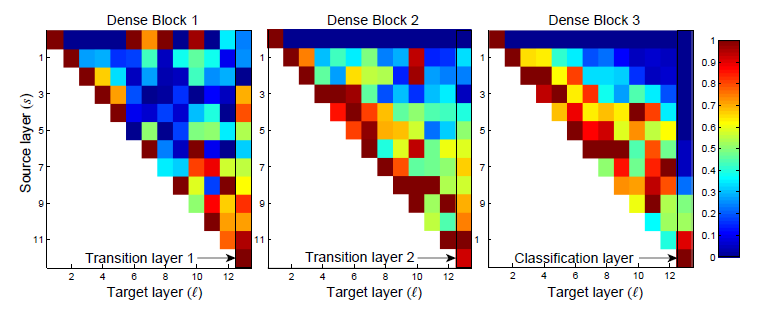

Figure 5 shows a heatmap for all three dense blocks.

A red dot in position ($l$; s) indicates that the layer $l$ on average makes strong use of feature-maps produced s-layers before.

Observations:

1. All layers spread their weights over many inputs within the same block. <br>
2. The weights of the transition layers also spread their weight across all layers within the preceding dense block. <br>
3. The layers within the second and third dense block consistently assign the least weight to the outputs of the transition layer. <br>
4. The last classification layer also uses across the entire dense block, but there seems to be a concentration towards final feature-maps.

### Conclusion

> 1. Following a simple connectivity rule, DenseNets naturally integrate the properties of identity mappings, deep supervision, and diversified depth.<br>
> 2. They allow feature reuse throughout the networks and can consequently learn more compact and more accurate models.<br>
> 3. And, because of their compact internal representations and reduced feature redundancy, DenseNets may be good feature extractors for various computer vision tasks that build on convolutional features.